<a id="tercero"></a>
## 3. Autoencoders (AEs) en MNIST
Como se ha discutido en clases, las RBM’s y posteriormente los AE’s (redes no supervisadas) fueron un componente crucial en el desarrollo de los modelos que entre 2006 y 2010 vigorizaron el área de las redes neuronales artificiales con logros notables de desempeño en diferentes tareas de aprendizaje automático. En esta sección aprenderemos a utilizar el más sencillo de estos modelos: un autoencoder o AE. Consideraremos tres aplicaciones clásicas: reducción de dimensionalidad, denoising y pre-entrenamiento. Con este objetivo en mente, utilizaremos un dataset denominado MNIST. Se trata de una colección de 70000 imágenes de 28 $\times$ 28 pixeles correspondientes a dígitos manuscritos (números entre 0 y 9). En su versión tradicional, la colección se encuentra separada en dos subconjuntos: uno de entrenamiento de 60000 imágenes y otro de test de 10000 imágenes. La tarea consiste en construir un programa para que aprenda a identificar correctamente el dı́gito representado en la imagen


> a) Escriba una función que cargue los datos desde el repositorio de keras, normalice las imágenes de modo que los pixeles queden en [0, 1], transforme las imágenes en vectores ($\in {\rm I\!R}^{784}$) y devuelva tres subconjuntos disjuntos: uno de entrenamiento, uno de validación y uno de pruebas. Construya el conjunto de validación utilizando los últimos $nval = 5000$ casos del conjunto del entrenamiento. El conjunto de entrenamiento consistirá en las primeras $60000 - nval$ imágenes.
```python
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255. #and x_test
#Define here your validation set
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
```



In [7]:
from keras.datasets import mnist
import numpy as np
from keras.utils import np_utils, plot_model

(x_training, y_training), (x_test, y_test) = mnist.load_data()

print("Las dimensiones del dataframe de entrenamiento son:",x_training.shape)
print("Las dimensiones del dataframe de entrenamiento son:",y_training.shape)
print("Las dimensiones del dataframe de pruebas son:",x_test.shape)
print("Las dimensiones del dataframe de pruebas son:",y_test.shape)

Las dimensiones del dataframe de entrenamiento son: (60000, 28, 28)
Las dimensiones del dataframe de entrenamiento son: (60000,)
Las dimensiones del dataframe de pruebas son: (10000, 28, 28)
Las dimensiones del dataframe de pruebas son: (10000,)


In [8]:
x_training = x_training.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train=x_training[:55000]
y_train=y_training[:55000]
x_val=x_training[55000:]
y_val=y_training[55000:]

print("Las dimensiones del dataframe de entrenamiento son:",x_train.shape)
print("Las dimensiones del dataframe de entrenamiento son:",y_train.shape)
print("Las dimensiones del dataframe de validación son:",x_val.shape)
print("Las dimensiones del dataframe de validación son:",y_val.shape)
print("Las dimensiones del dataframe de pruebas son:",x_test.shape)
print("Las dimensiones del dataframe de pruebas son:",y_test.shape)

Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Las dimensiones del dataframe de entrenamiento son: (55000, 28, 28)
Las dimensiones del dataframe de entrenamiento son: (55000,)
Las dimensiones del dataframe de validación son: (5000, 28, 28)
Las dimensiones del dataframe de validación son: (5000,)
Las dimensiones del dataframe de pruebas son: (10000, 28, 28)
Las dimensiones del dataframe de pruebas son: (10000,)


se cargan los datos a trabajar (keras datasets) // MNIST, 28x28 px. 
//val: los últimos 5000  del training set
// test: 10000 
Se normalizan los datos dejándolos entre 0 y 1

### 3.1 Reducción de dimensionalidad
Para esta primera sección se trabajará con un autoencoder tradicional (*feed forward*) en donde las capas de este son densas. Para esto se re estructuraran los datos de entradas en forma de vector, es decir la matriz de 28 $\times$ 28 pasa a ser un vector de 784 componentes.

```python
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
```

Una de las aplicaciones tı́picas de un AE es reducción de dimensionalidad, es decir, implementar una transformación $\phi:{\rm I\!R}^d \leftarrow {\rm I\!R}^{d'}$ de objetos representados originalmente por $d$ atributos en una nueva representación de $d'$ atributos, de modo tal que se preserve lo mejor posible la “información” original. Obtener tal representación es útil desde un punto de vista computacional (compresión) y estadı́stico (permite construir modelos con un menor número de parámetros libres). Un AE es una técnica de reducción de dimensionalidad no supervisada porque no hace uso de información acerca de las clases a las que pertenecen los datos de entrenamiento
> a) Entrene un AE básico (1 capa escondida) para generar una representación de MNIST en $d'$= 2, 8, 32, 64 dimensiones. Justifique la elección de la función de pérdida a utilizar y del criterio de entrenamiento en general. Determine el porcentaje de compresión obtenido y el error de reconstrucción en cada caso. ¿Mejora el resultado si elegimos una función de activación **ReLU** para el Encoder? ¿Podrı́a utilizarse esta activación en el Decoder?
```python
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
input_img = Input(shape=(784,))
encoded = Dense(32, activation='sigmoid')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
##
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('basic_autoencoder_768x32.h5')
#save other stuffs
```



In [9]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from IPython.display import Image, display, SVG

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print("Las dimensiones del dataframe de entrenamiento son:",x_train.shape)
print("Las dimensiones del dataframe de entrenamiento son:",y_train.shape)
print("Las dimensiones del dataframe de validación son:",x_val.shape)
print("Las dimensiones del dataframe de validación son:",y_val.shape)
print("Las dimensiones del dataframe de pruebas son:",x_test.shape)
print("Las dimensiones del dataframe de pruebas son:",y_test.shape)

Las dimensiones del dataframe de entrenamiento son: (55000, 784)
Las dimensiones del dataframe de entrenamiento son: (55000,)
Las dimensiones del dataframe de validación son: (5000, 784)
Las dimensiones del dataframe de validación son: (5000,)
Las dimensiones del dataframe de pruebas son: (10000, 784)
Las dimensiones del dataframe de pruebas son: (10000,)


Entrenando modelo para  2 dimensiones
Autoencoder


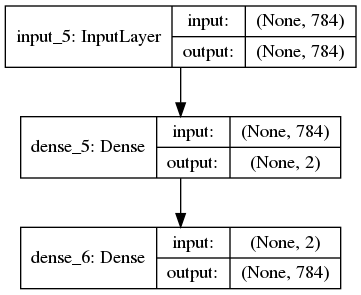

Encoder


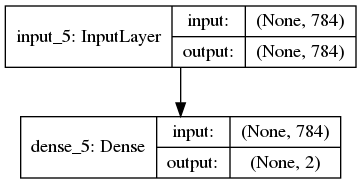

Decoder


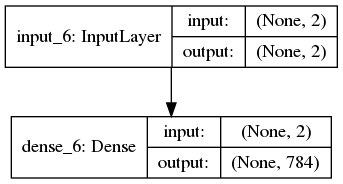

Entrenando modelo para  8 dimensiones
Autoencoder


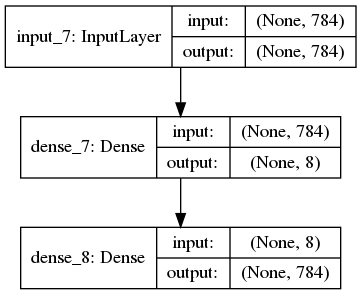

Encoder


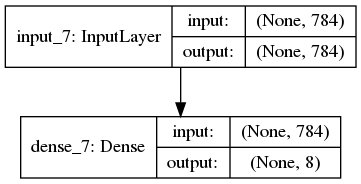

Decoder


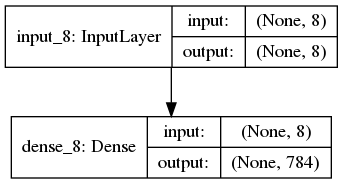

Entrenando modelo para  32 dimensiones
Autoencoder


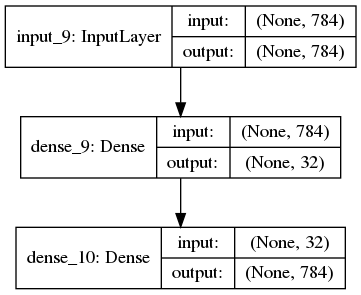

Encoder


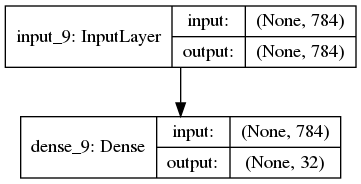

Decoder


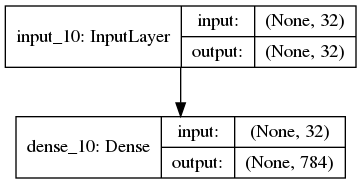

Entrenando modelo para  64 dimensiones
Autoencoder


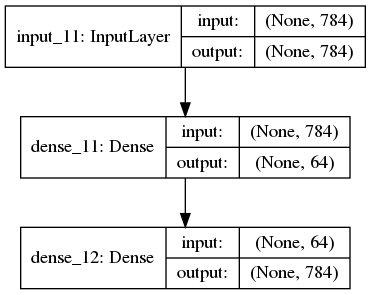

Encoder


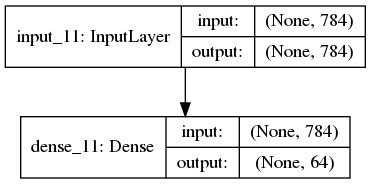

Decoder


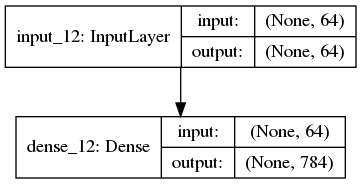

In [11]:
dimns=[2,8,32,64]
hist1=[]
for dim in dimns:
    print ("Entrenando modelo para ", dim, "dimensiones")
    input_img = Input(shape=(784,))
    encoded = Dense(dim, activation='sigmoid')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_img, outputs=decoded)
    encoder = Model(inputs=input_img, outputs=encoded)
    encoded_input = Input(shape=(dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
    print ("Autoencoder")
    plot_model(autoencoder, to_file='model_auto1.png', show_shapes=True)
    display(Image(filename='model_auto1.png'))
    print ("Encoder")
    plot_model(encoder, to_file='model_enc1.png', show_shapes=True)
    display(Image(filename='model_enc1.png'))
    print ("Decoder")
    plot_model(decoder, to_file='model_dec1.png', show_shapes=True)
    display(Image(filename='model_dec1.png'))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    hist = autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,verbose=0,shuffle=True,validation_data=(x_val, x_val))
    autoencoder.save('basic_autoencoder_sig_768x'+str(dim)+'.h5')
    hist1.append(hist)




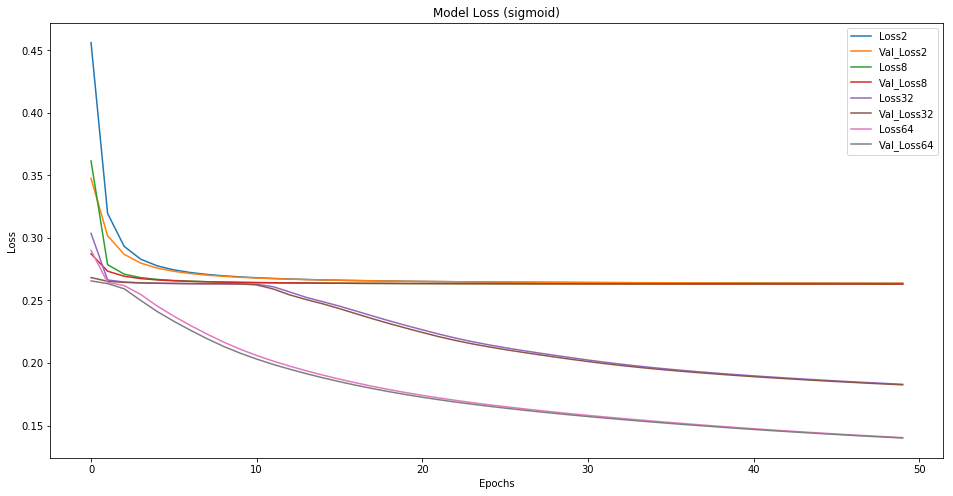

In [12]:
import matplotlib.pyplot as plt 
%matplotlib inline

i=0
plt.figure(figsize=(16, 8))
for hist in hist1: 
    plt.plot(hist.history['loss'],label="Loss"+str(dimns[i]))
    plt.plot(hist.history['val_loss'],label="Val_Loss"+str(dimns[i]))   
    i+=1
    
plt.title("Model Loss (sigmoid)") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()


In [ ]:
hist1_relu=[]
for dim in dimns:
    print ("Entrenando modelo para ", dim, "dimensiones")
    input_img = Input(shape=(784,))
    encoded = Dense(dim, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_img, outputs=decoded)
    encoder = Model(inputs=input_img, outputs=encoded)
    encoded_input = Input(shape=(dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
    
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    hist = autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,verbose=0,shuffle=True,validation_data=(x_val, x_val))
    autoencoder.save('basic_autoencoder_relu_768x'+str(dim)+'.h5')
    hist1_relu.append(hist)


Entrenando modelo para  2 dimensiones
Entrenando modelo para  8 dimensiones


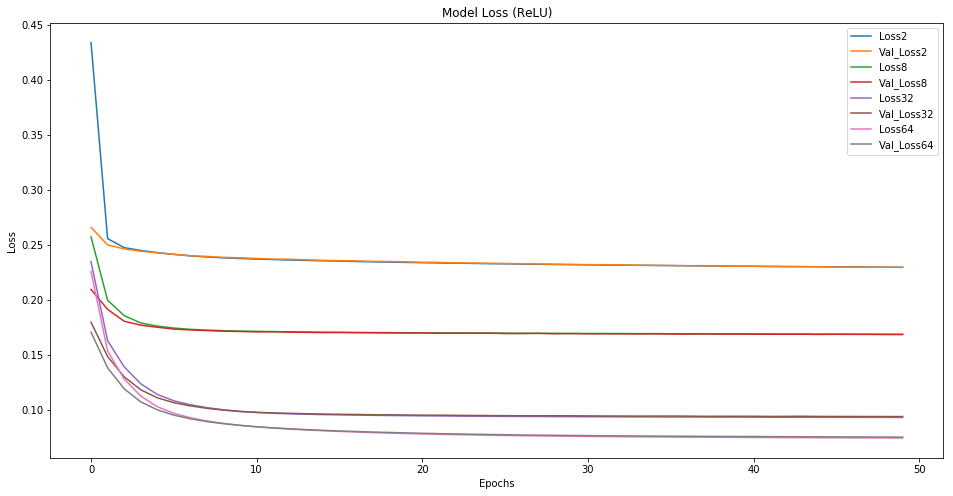

In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline

i=0
plt.figure(figsize=(16, 8))
for hist in hist1_relu: 
    plt.plot(hist.history['loss'],label="Loss"+str(dimns[i]))
    plt.plot(hist.history['val_loss'],label="Val_Loss"+str(dimns[i]))   
    i+=1
    
plt.title("Model Loss (ReLU)") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()


> b) Compare visualmente la reconstrucción que logra hacer el autoencoder desde la representación en ${\rm I\!R}^{d'}$ para algunas imágenes del conjunto de pruebas. Determine si la percepción visual se corresponde con el error de reconstrucción observada. Comente.
```python
from keras.models import load_model
autoencoder = load_model('basic_autoencoder_768x32.h5')
#load other stuff ...
encoded_test = encoder.predict(x_test)
decoded_test = decoder.predict(encoded_test)
import matplotlib
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_test[i].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
```



### Sigmoid

Reconstrucción obtenida con 2 dimensiones
10000/10000 [==============================] - 1s 61us/step
Error de reconstruccion encoder: 0.2633482473373413


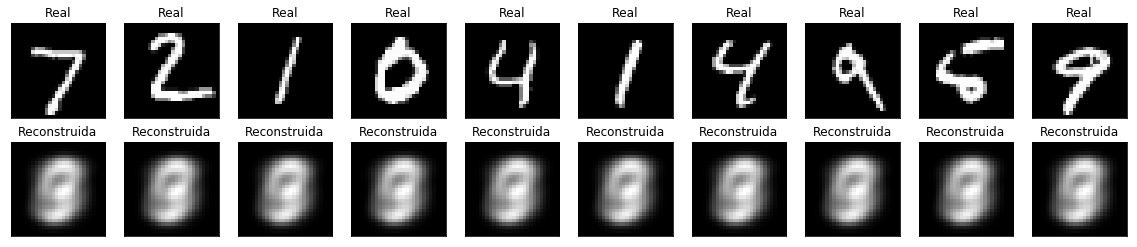

Reconstrucción obtenida con 8 dimensiones
10000/10000 [==============================] - 1s 63us/step
Error de reconstruccion encoder: 0.2627177175998688


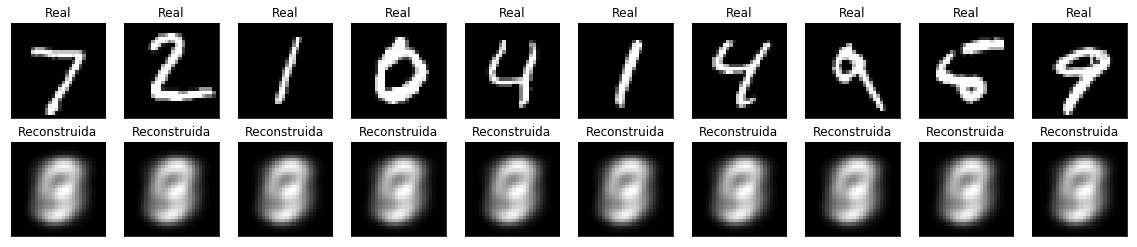

Reconstrucción obtenida con 32 dimensiones
10000/10000 [==============================] - 1s 65us/step
Error de reconstruccion encoder: 0.18158046033382416


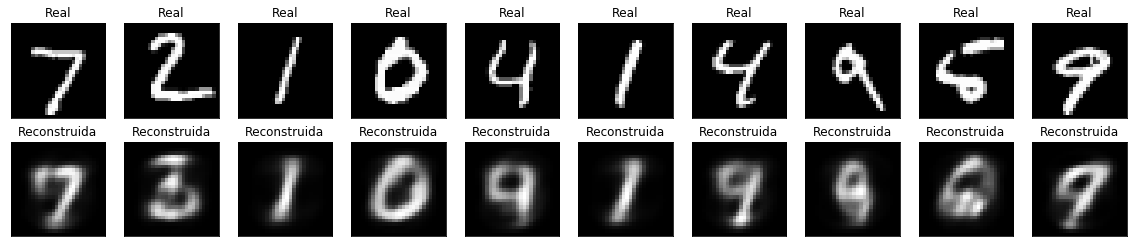

Reconstrucción obtenida con 64 dimensiones
10000/10000 [==============================] - 1s 67us/step
Error de reconstruccion encoder: 0.13861064875125886


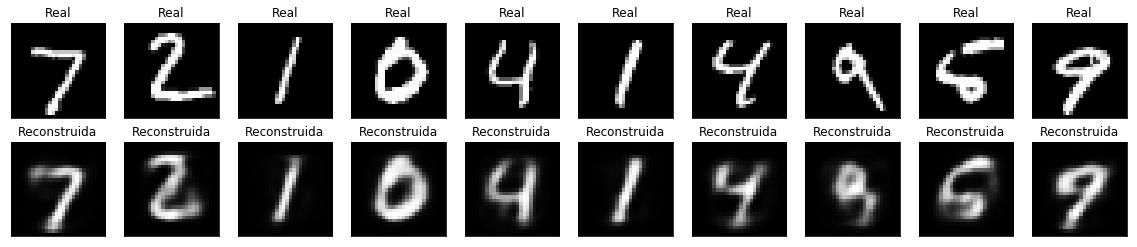

In [18]:
from keras.models import load_model

for dim in dimns:
    print ("Reconstrucción obtenida con", str(dim), "dimensiones")
    autoencoder = load_model('./basic_autoencoder_sig_768x'+str(dim)+'.h5')
    #Reconstruir desde autoencoder (encoder --> decoder)
    score = autoencoder.evaluate(x_test,x_test)
    print ("Error de reconstruccion encoder:", score) 
    
    input_img = autoencoder.input
    encoder_layer = autoencoder.layers[-2]
    encoder = Model(inputs=input_img, outputs=encoder_layer(input_img))
    decoded_shape = Input(shape=(dim,))   
    decoder_layer = autoencoder.layers[-1] 
    decoder = Model(inputs=decoded_shape, outputs=decoder_layer(decoded_shape))

    encoded_test = encoder.predict(x_test)
    decoded_test = decoder.predict(encoded_test)  
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):    
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.title("Real")
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.title("Reconstruida")    
    plt.show()

### ReLU

Reconstrucción obtenida con 2 dimensiones (ReLU) 
10000/10000 [==============================] - 1s 75us/step
Error de reconstruccion encoder: 0.22855340344905853


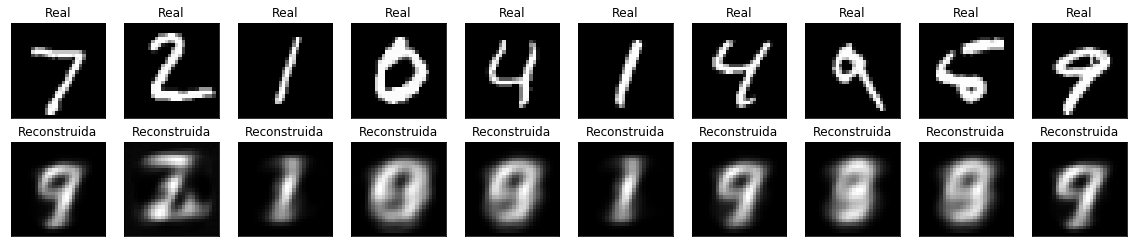

Reconstrucción obtenida con 8 dimensiones (ReLU) 
10000/10000 [==============================] - 1s 74us/step
Error de reconstruccion encoder: 0.16724908947944642


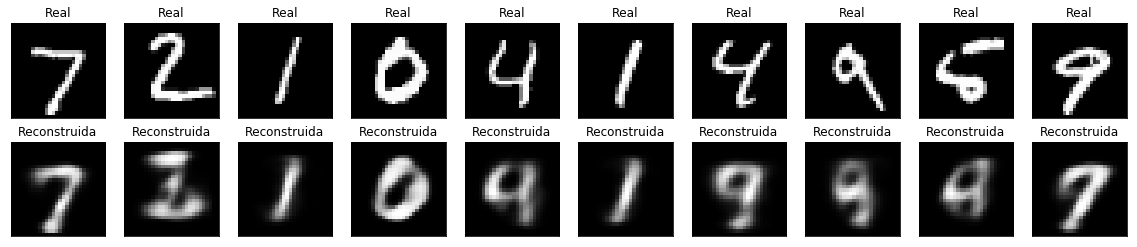

Reconstrucción obtenida con 32 dimensiones (ReLU) 
10000/10000 [==============================] - 1s 77us/step
Error de reconstruccion encoder: 0.09219028354883194


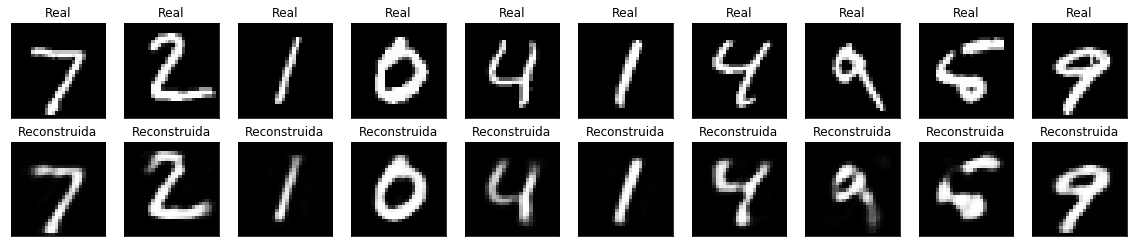

Reconstrucción obtenida con 64 dimensiones (ReLU) 
10000/10000 [==============================] - 1s 77us/step
Error de reconstruccion encoder: 0.07401222167015076


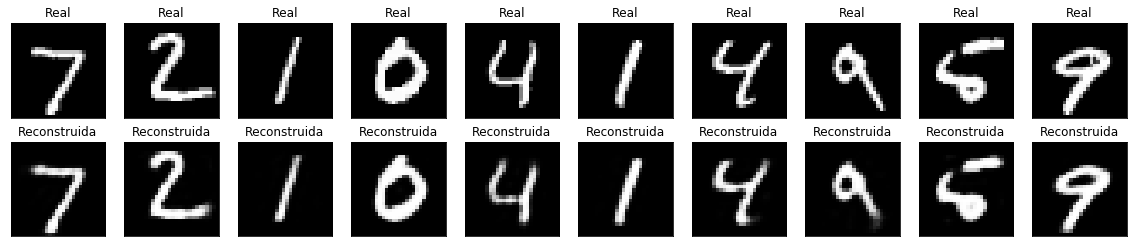

In [20]:
for dim in dimns:
    print ("Reconstrucción obtenida con", str(dim), "dimensiones (ReLU) ")
    autoencoder = load_model('./basic_autoencoder_relu_768x'+str(dim)+'.h5')
    #Reconstruir desde autoencoder (encoder --> decoder)
    score = autoencoder.evaluate(x_test,x_test)
    print ("Error de reconstruccion encoder:", score) 
    
    input_img = autoencoder.input
    encoder_layer = autoencoder.layers[-2]
    encoder = Model(inputs=input_img, outputs=encoder_layer(input_img))
    decoded_shape = Input(shape=(dim,))   
    decoder_layer = autoencoder.layers[-1] 
    decoder = Model(inputs=decoded_shape, outputs=decoder_layer(decoded_shape))

    encoded_test = encoder.predict(x_test)
    decoded_test = decoder.predict(encoded_test)  
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):    
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.title("Real")
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.title("Reconstruida")    
    plt.show()

> c) Para verificar la calidad de la representación obtenida, implemente el clasificador denominado $kNN$ (k-nearest neighbor): dada una imagen $x$, el clasificador busca las k = 10 imágenes de entrenamiento más similares (de acuerdo a una distancia, e.g. euclidiana) y predice como clase, la etiqueta más popular entre las imágenes cercanas. Mida el error de pruebas obtenido construyendo este clasificador sobre la data reducida a través del autocnder comparando con la representación reducida obtenida vía PCA (una técnica clásica de reducción de dimensionalidad) utilizando el mismo número de dimensiones $d'$= 2, 4, 8, 16, 32. Considere tanto el error de reconstrucción como el desempeño en clasificación , además de comparar los tiempos medios de predicción en ambos escenarios.
```python
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
pca = PCA(n_components=d)
#PCA
pca.fit(x_train)
pca_train = pca.transform(x_train)
pca_test = pca.transform(x_test)
#AUTOENCODER
encoded_train = encoder.predict(x_train)
encoded_test = encoder.predict(x_test)
#CLASIFICATION
clf = KNeighborsClassifier(10)
clf.fit(pca_train, y_train)
print 'Classification Accuracy PCA %.2f' % clf.score(pca_test,y_test)
clf = KNeighborsClassifier(10)
clf.fit(encoded_train, y_train)
print 'Classification Accuracy %.2f' % clf.score(encoded_test,y_test)
```



In [19]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import time

for dim in dimns:
    print ("\nComparación ajuste obtenido con", str(dim), "dimensiones")
    autoencoder = load_model('./basic_autoencoder_relu_768x'+str(dim)+'.h5')
    #Evaluate performance 
    score = autoencoder.evaluate(x_test,x_test)    
    print ("Error de reconstruccion encoder:", score)   
    
    #Reconstruir los encoder desde el autoencoder
    input_img = autoencoder.input
    encoder_layer = autoencoder.layers[-2]
    inicio = time.time()
    encoder = Model(inputs=input_img, outputs=encoder_layer(input_img))    
    encoded_train = encoder.predict(x_train)
    encoded_test = encoder.predict(x_test)
    
    clf = KNeighborsClassifier(10)
    clf.fit(encoded_train, y_train)
    #mean accuracy on the given test data
    print ("Encoder Accuracy en datos",dim,"-dimensionales",clf.score(encoded_test,y_test),"con", (time.time() - inicio),"segundos")

    inicio = time.time()
    pca = PCA(n_components=dim)
    pca.fit(x_train)
    pca_train = pca.transform(x_train)
    pca_test = pca.transform(x_test)
    
    clf = KNeighborsClassifier(10)
    clf.fit(pca_train, y_train)
    #mean accuracy on the given test data
    print ("PCA Accuracy en datos",dim,"-dimensionales",clf.score(pca_test,y_test) ,"con", (time.time() - inicio),"segundos") 


Comparación ajuste obtenido con 2 dimensiones
10000/10000 [==============================] - 1s 83us/step
Error de reconstruccion encoder: 0.22973107354640962
Encoder Accuracy en datos 2 -dimensionales 0.384 con 2.150782585144043 segundos
PCA Accuracy en datos 2 -dimensionales 0.4378 con 3.934356927871704 segundos

Comparación ajuste obtenido con 8 dimensiones
10000/10000 [==============================] - 1s 84us/step
Error de reconstruccion encoder: 0.1660864952325821
Encoder Accuracy en datos 8 -dimensionales 0.8999 con 3.169844150543213 segundos
PCA Accuracy en datos 8 -dimensionales 0.9025 con 5.471010446548462 segundos

Comparación ajuste obtenido con 32 dimensiones
10000/10000 [==============================] - 1s 85us/step
Error de reconstruccion encoder: 0.09215293523073197
Encoder Accuracy en datos 32 -dimensionales 0.9668 con 39.98647141456604 segundos
PCA Accuracy en datos 32 -dimensionales 0.9744 con 35.70294213294983 segundos

Comparación ajuste obtenido con 64 dimension

#### comparar mil numeritos y ver que la cosa es mejor con mas dim. y con PCA se tienen leves mejores resultados a costa de mayor tiempo de ejecucion (a excepcion de 64 dimensiones) 

> d) Modifique el autoencoder básico construido en (a) para implementar un deep autoencoder (*deep AE*), es decir, un autoencoder con al menos dos capas ocultas. Demuestre experimentalmente que este autoencoder puede mejorar la compresión obtenida por PCA utilizando el mismo número de dimensiones $d'$ . Experimente con $d'$ =2, 4, 8, 16 y distintas profundidades (L = 2, 3, 4). Considere en esta comparación tanto el error de reconstrucción como el desempeño en clasificación (vı́a kNN) de cada representación. Comente.
```python
target_dim = 2 #try other and do a nice plot
input_img = Input(shape=(784,))
encoded1 = Dense(1000, activation='relu')(input_img)
encoded2 = Dense(500, activation='relu')(encoded1)
encoded3 = Dense(250, activation='relu')(encoded2)
encoded4 = Dense(target_dim, activation='relu')(encoded3)
decoded4 = Dense(250, activation='relu')(encoded4)
decoded3 = Dense(500, activation='relu')(encoded3)
decoded2 = Dense(1000, activation='relu')(decoded3)
decoded1 = Dense(784, activation='sigmoid')(decoded2)
autoencoder = Model(input=input_img, output=decoded1)
encoder = Model(input=input_img, output=encoded3)
autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=40,batch_size=32,validation_data=(x_val,x_val))
autoencoder.save('my_autoencoder_768x1000x500x250x2.h5')
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
pca = PCA(n_components=target_dim)
pca.fit(x_train)
```




In [34]:
print ("sdfsdaaaf")

sdfsdaaaf


In [31]:
## entrenar red 2 capas
hist2=[]
for dim in dimns:
    print ("Entrenando modelo para ", dim, "dimensiones")
    input_img = Input(shape=(784,))
    encodeda = Dense(1000, activation='relu')(input_img)
    encodedb = Dense(dim, activation='relu')(encodeda)
    decodedb = Dense(1000, activation='relu')(encodedb)
    decodeda = Dense(784, activation='sigmoid')(decodedb)
    autoencoder = Model(inputs=input_img, outputs=decodeda)
    encoder = Model(inputs=input_img, outputs=encodedb)
    
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    hist = autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,verbose=0,shuffle=True,validation_data=(x_val, x_val))
    autoencoder.save('basic_autoencoder_2capasR_768x1000x'+str(dim)+'.h5')
    hist2.append(hist)


Entrenando modelo para  2 dimensiones
Entrenando modelo para  8 dimensiones
Entrenando modelo para  32 dimensiones
Entrenando modelo para  64 dimensiones


In [ ]:
#entrenar red 3 capas
hist3=[]
for dim in dimns:
    print ("Entrenando modelo para ", dim, "dimensiones")
    input_img = Input(shape=(784,))
    encodeda = Dense(1000, activation='relu')(input_img)
    encodedb = Dense(600, activation='relu')(encodeda)
    encodedc = Dense(dim, activation='relu')(encodedb)
    decodedc = Dense(600, activation='relu')(encodedc)
    decodedb = Dense(1000, activation='relu')(decodedc)
    decodeda = Dense(784, activation='sigmoid')(decodedb)
    autoencoder = Model(inputs=input_img, outputs=decodeda)
    #encoder = Model(inputs=input_img, outputs=encodedc)
    
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    hist = autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,verbose=0,shuffle=True,validation_data=(x_val, x_val))
    autoencoder.save('basic_autoencoder_3capasR_768x1000x600x'+str(dim)+'.h5')
    hist3.append(hist)


Entrenando modelo para  2 dimensiones


In [53]:
#entrenar red 4 capas
hist4=[]
for dim in dimns:
    print ("Entrenando modelo para ", dim, "dimensiones")
    input_img = Input(shape=(784,))
    encodeda = Dense(1000, activation='relu')(input_img)
    encodedb = Dense(600, activation='relu')(encodeda)
    encodedc = Dense(300, activation='relu')(encodedb)
    encodedd = Dense(dim, activation='relu')(encodedc)
    decodedd = Dense(300, activation='relu')(encodedd)
    decodedc = Dense(600, activation='relu')(decodedd)
    decodedb = Dense(1000, activation='relu')(decodedc)
    decodeda = Dense(784, activation='sigmoid')(decodedb)
    autoencoder = Model(inputs=input_img, outputs=decodeda)
    
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    hist = autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,verbose=0,shuffle=True,validation_data=(x_val, x_val))
    autoencoder.save('basic_autoencoder_4capasR_768x1000x600x300x'+str(dim)+'.h5')
    hist4.append(hist)


Entrenando modelo para  2 dimensiones
Entrenando modelo para  8 dimensiones
Entrenando modelo para  32 dimensiones
Entrenando modelo para  64 dimensiones


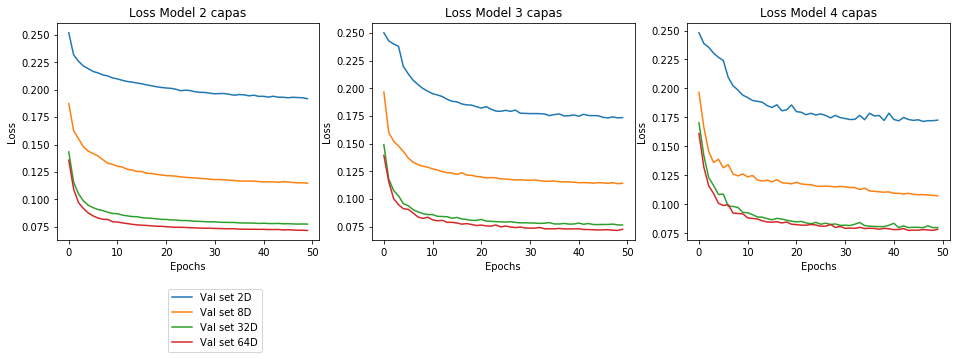

In [62]:
todo=[hist2,hist3,hist4]
f, axarr = plt.subplots(1,3, figsize=(16,4))
j=0
for history in todo: #para cada profundiad
    i=0
    for hist in history: #s,dimns): #para cada dimension
        axarr[j].plot( hist.history['val_loss'],label = "Val set "+str(dimns[i])+"D")
        axarr[j].set_title('Loss Model '+str(j+2)+ ' capas')
        axarr[j].set_xlabel('Epochs')
        axarr[j].set_ylabel('Loss')
        i+=1
    j+=1

axarr[0].legend(loc="upper right", fancybox= True,bbox_to_anchor=(.8,-.2))
plt.show()

In [64]:
for dim in dimns:
    print ("\n\nConsiderando", str(dim), "dimensiones: ")  
    #autoencoder
    #2 capas
    print ("\n2 capas ocultas")
    autoencoder = load_model('./basic_autoencoder_2capasR_768x1000x'+str(dim)+'.h5')
    score = autoencoder.evaluate(x_test,x_test)      
    print ("Error de reconstruccion encoder:", score)   
    inicio = time.time()     
    input_img = autoencoder.input
    encoder_layer = autoencoder.layers[-3]
    encoder = Model(inputs=input_img, outputs=encoder_layer(autoencoder.layers[-4].output))    
    encoded_train = encoder.predict(x_train)
    encoded_test = encoder.predict(x_test)    
    clf = KNeighborsClassifier(10)
    clf.fit(encoded_train, y_train)
    print ("Encoder Accuracy (2 capas)",clf.score(encoded_test,y_test),"con", (time.time() - inicio),"segundos")

    #3 capas
    print ("\n3 capas ocultas")
    autoencoder = load_model('./basic_autoencoder_3capasR_768x1000x600x'+str(dim)+'.h5')
    score = autoencoder.evaluate(x_test,x_test)
    print ("Error de reconstruccion encoder:", score)   
    inicio = time.time()
    input_img = autoencoder.input
    encoder_layer = autoencoder.layers[-4]
    encoder = Model(inputs=input_img, outputs=encoder_layer(autoencoder.layers[-5].output))
    encoded_train = encoder.predict(x_train)
    encoded_test = encoder.predict(x_test)    
    clf = KNeighborsClassifier(10)
    clf.fit(encoded_train, y_train)
    print ("Encoder Accuracy (3 capas)",clf.score(encoded_test,y_test),"con", (time.time() - inicio),"segundos")

    #4 capas
    print ("\n4 capas ocultas")
    autoencoder = load_model('./basic_autoencoder_4capasR_768x1000x600x300x'+str(dim)+'.h5')
    score = autoencoder.evaluate(x_test,x_test)
    print ("Error de reconstruccion encoder:", score)   
    inicio = time.time()
    input_img = autoencoder.input
    encoder_layer = autoencoder.layers[-5]
    encoder = Model(inputs=input_img, outputs=encoder_layer(autoencoder.layers[-6].output))
    encoded_train = encoder.predict(x_train)    
    encoded_test = encoder.predict(x_test)    
    clf = KNeighborsClassifier(10)
    clf.fit(encoded_train, y_train)
    print ("Encoder Accuracy (4 capas)",clf.score(encoded_test,y_test),"con", (time.time() - inicio),"segundos")
    
    
    #PCA
    print ("\nReducción mediante PCA...")
    inicio = time.time()
    pca = PCA(n_components=dim)
    pca.fit(x_train)
    pca_train = pca.transform(x_train)
    pca_test = pca.transform(x_test)
    
    clf = KNeighborsClassifier(10)
    clf.fit(pca_train, y_train)
    print ("PCA Accuracy en datos",clf.score(pca_test,y_test) ,"con", (time.time() - inicio),"segundos") 
        



Considerando 2 dimensiones: 

2 capas ocultas
10000/10000 [==============================] - 2s 195us/step
Error de reconstruccion encoder: 0.19244186048507692
Encoder Accuracy (2 capas) 0.6145 con 4.867496490478516 segundos

3 capas ocultas
10000/10000 [==============================] - 2s 201us/step
Error de reconstruccion encoder: 0.1747287821531296
Encoder Accuracy (3 capas) 0.7718 con 4.947525978088379 segundos

4 capas ocultas
10000/10000 [==============================] - 2s 208us/step
Error de reconstruccion encoder: 0.1735623545885086
Encoder Accuracy (4 capas) 0.7883 con 5.134270668029785 segundos

Reducción mediante PCA...
PCA Accuracy en datos 0.4378 con 3.810399293899536 segundos


Considerando 8 dimensiones: 

2 capas ocultas
10000/10000 [==============================] - 2s 203us/step
Error de reconstruccion encoder: 0.11408184807300567
Encoder Accuracy (2 capas) 0.9421 con 6.22305154800415 segundos

3 capas ocultas
10000/10000 [==============================] - 2s 214

#### comentar el monton de cosas ... se presenta el accuracy sobre el test set obtenido con KNN en distintas dimensiones en reducciones en base a PCA y autoencoders en distintas profundidades.  
Profundidad 3 y 4 acusan mejor accuracy que PCA se podria afirmar que el autoencoder logra extraer información más relevante que PCA.  siendo con 4 capas mejor que 3 ...entre más profunda mayor poder de interpretación de los datos

##### Encoder Accuracy (3 capas) 0.9758 

> e) Elija algunas de las representaciones aprendidas anteriormente y visualı́celas usando la herramienta *TSNE* disponible en la librerı́a *sklearn*. Compare cualitativamente el resultado con aquel obtenido usando PCA con el mismo número de componentes
```python
nplot=5000 #warning: mind your memory!
encoded_train = encoder.predict(x_train[:nplot])
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)
plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
for idx in xrange(0,nplot):
    label = y_train[idx]
    line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)
pca_train = pca.transform(x_train)
encoded_train = pca_train[:nplot]
... #plot PCA
```




Reducción mediante Encoder...


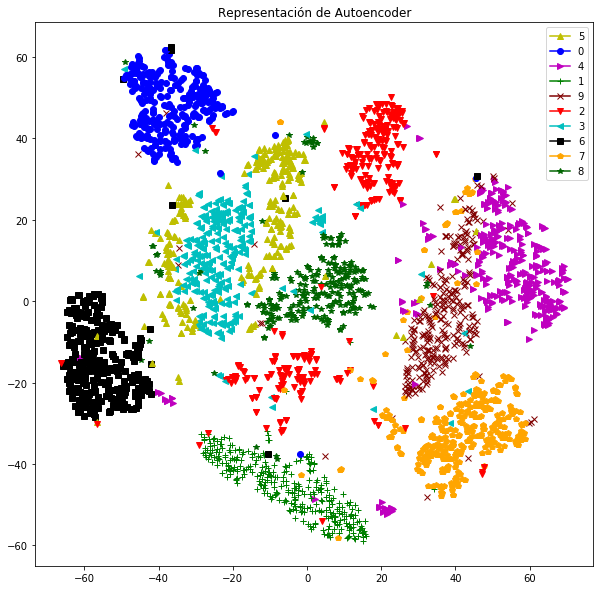


Reducción mediante PCA...


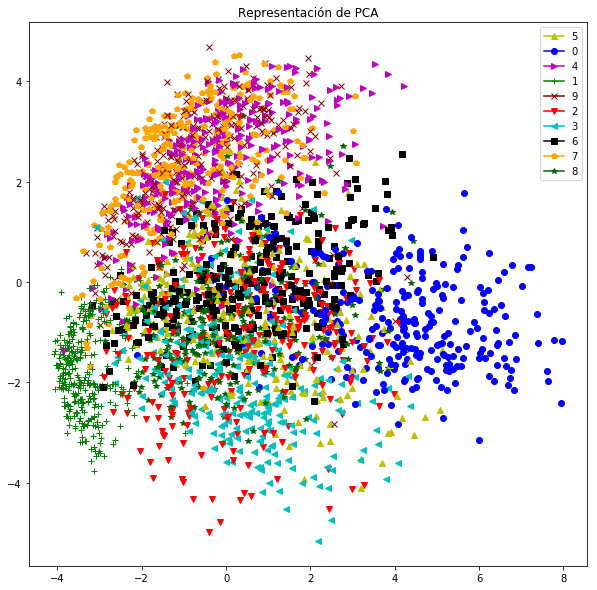

In [90]:
from sklearn.manifold import TSNE
%matplotlib inline
nplot=3000 #modificar!

autoencoder = load_model('./basic_autoencoder_3capasR_768x1000x600x32.h5')
print ("\nReducción mediante Encoder...")  
input_img = autoencoder.input
encoder_layer = autoencoder.layers[-4]
encoder = Model(inputs=input_img, outputs=encoder_layer(autoencoder.layers[-5].output))
encoded_train = encoder.predict(x_train[:nplot])
#encoded_test = encoder.predict(x_test)    
#http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE.fit_transform
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(encoded_train)

plt.figure(figsize=(10, 10))
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'orange',8:'darkgreen',9:'maroon'}
markers={0:'o',1:'+',2: 'v',3:'<',4:'>',5:'^',6:'s',7:'p',8:'*',9:'x'}
vistos=set(np.arange(10))
for idx in np.arange(0,nplot):
    label = y_train[idx]
    if label in vistos:
        #agregar con label solo el primer digito observade de cada tipo 
        line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6, label = str(label))
        vistos.remove(label)
    else:
        line = plt.plot(encoded_train[idx][0], encoded_train[idx][1],
        color=colors[label], marker=markers[label], markersize=6)
    
plt.title("Representación de Autoencoder")
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(10, 10))
print ("\nReducción mediante PCA...")
pca = PCA(n_components=32)
pca.fit(x_train)
pca_nplot = pca.transform(x_train[:nplot])
model = TSNE(n_components=2, random_state=0)
encoded_train = model.fit_transform(pca_nplot)
vistos=set(np.arange(10))
for idx in np.arange(0,nplot):
    label = y_train[idx]
    if label in vistos:
        #agregar con label solo el primer digito observade de cada tipo 
        line = plt.plot(pca_nplot[idx][0], pca_nplot[idx][1],
        color=colors[label], marker=markers[label], markersize=6, label = str(label))
        vistos.remove(label)
    else:
        line = plt.plot(pca_nplot[idx][0], pca_nplot[idx][1],
        color=colors[label], marker=markers[label], markersize=6)
    
plt.title("Representación de PCA")
plt.legend(loc="upper right")
plt.show()


### claramente PCA se ve superado por el modelo profundo de autoencoder...explayarse

> f) Modifique el autoencoder construido en (a) para trabajar directamente sobre las imágenes de MNIST, sin tratarlas como vectores de 784 atributos, sino como matrices de tamaño $1\times28\times28$. Es posible lograr este objetivo utilizando capas convolucionales para definir el Encoder y el Decoder, comente como sufre las transformaciones el patrón de entrada. Compare la calidad de la representación reducida obtenida por el nuevo autoencoder con aquella obtenida anteriormente utilizando el mismo número de dimensiones. Comente.
```python
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) #modify for th dim ordering
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), border_mode='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()
```


In [91]:

#Reconstruir la estructura espacial  de la imagen 28 x 28 un canal
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_val = np.reshape(x_val,(len(x_val),28,28,1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [94]:
from keras.layers.convolutional import *

nput_img = Input(shape=(28, 28, 1))
encodeda = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
encodedb = MaxPooling2D((2, 2), border_mode='same')(encodeda)
encodedc = Conv2D(8, (3, 3), activation='relu', padding='same')(encodedb)
encoder_d = MaxPooling2D((2, 2))(encodedc)
decodedc = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder_d)
decodedb = UpSampling2D((2, 2))(decodedc)
decodeda= Conv2D(16, (3, 3), activation='relu', padding='same')(decodedb)

integrado = UpSampling2D((2, 2))(decodeda)
decoded_d = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(integrado)
autoencoder = Model(input_img, decoded_d)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_59 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 8)         0         
__________

/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), padding="same")`


In [96]:
history = autoencoder.fit(x_train,x_train,epochs=30,batch_size=32,verbose=0,shuffle=True,validation_data=(x_val, x_val))
autoencoder.save('./basic_autoencoder_convolucional.h5')

In [98]:
autoencoder = load_model('./basic_autoencoder_convolucional.h5')

input_img = autoencoder.input
encoder_layer = autoencoder.layers[-6]
encoder = Model(inputs=input_img, outputs=encoder_layer(autoencoder.layers[-7].output))

encoded_train = encoder.predict(x_train).reshape(len(x_train),7*7*8)
encoded_test = encoder.predict(x_test).reshape(len(x_test),7*7*8)

inicio = time.time()
clf = KNeighborsClassifier(10)
clf.fit(encoded_train, y_train)
print ("Encoder Accuracy ",clf.score(encoded_test,y_test),"con", (time.time() - inicio),"segundos")


Encoder Accuracy  0.9607 con 451.8669226169586 segundos


In [97]:
print (encoded_train.shape)

(3000, 2)


###  comentar...

### 3.2 Denoising
Como se ha discutido en clases, un denoising autoencoder (dAE) es esencialmente un autoencoder entrenado para reconstruir ejemplos parcialmente corruptos. Varios autores han demostrado que mediante esta modificación simple es posible obtener representaciones más robustas y significativas que aquellas obtenidas por un AE básico. En esta sección exploraremos la aplicación más “natural” o “directa” del método.

> a) Genere artificialmente una versión corrupta de las imágenes en MNIST utilizando el siguiente modelo de ruido (masking noise): si $x\in {\rm I\!R}^d$ es una de las imágenes originales, la versión ruidosa $\~{x}$ se obtiene como $\~{x} = x \odot \xi$ donde $\odot$ denota el producto de Hadamard (componente a componente) y $\xi \in {\rm I\!R}^d$ es un vector aleatorio binario con componentes *Ber(p)* independientes.
```python
from numpy.random import binomial
noise_level = 0.1
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train = x_train*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_val.shape)
noisy_x_val = x_val*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test = x_test*noise_mask
```


In [5]:
from numpy.random import binomial

def corromper(x_train,x_val,x_test,ruido):
    noise_level = ruido
    noise_mask_tr = binomial(n=1,p=noise_level,size=x_train.shape)
    noisy_x_train = x_train*noise_mask_tr
    noise_mask_v = binomial(n=1,p=noise_level,size=x_val.shape)
    noisy_x_val = x_val*noise_mask_v
    noise_mask_t = binomial(n=1,p=noise_level,size=x_test.shape)
    noisy_x_test = x_test*noise_mask_t
    
    return noisy_x_train, noisy_x_val, noisy_x_test

#### explicar que es esto. aunk el enunciado mismo dice xD ... A cada conjunto se le realiza un producto componente a componente con un arreglo binario de la misma dimensión del dataset dado por una distribución de Bernoulli (una Binomial). dejando sólo algunas componentes/pixeles 
#### A medida que p es mas bajo  más 0s habrán, es deicr, más ruido y más corruptas son las imágenes. 

> b) Entrene un autoencoder para reconstruir las imágenes corruptas generadas en el ı́tem anterior. Mida el error de reconstrucción y evalúe cualitativamente (visualización de la imagen corrupta y reconstruida) el resultado para un subconjunto representativo de imágenes. Experimente diferentes valores de *p* en el rango (0, 1).
```python
# DEFINE YOUR AUTOENCODER AS BEFORE
autoencoder.fit(noisy_x_train, x_train, epochs=40, batch_size=32, validation_data=(noisy_x_val, x_val))
```


In [10]:
hist_corruptos = []
ruidos=[0.1,0.2,0.3,0.45,0.75]
for ruido in ruidos:
    print ("Entrenando modelo para ruido p:", ruido)
    noisy_x_train, noisy_x_val, noisy_x_test = corromper(x_train, x_val, x_test, ruido)

    input_img = Input(shape=(784,))
    encoded = Dense(32, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_img, outputs=decoded)
    encoder = Model(inputs=input_img, outputs=encoded)
    encoded_input = Input(shape=(32,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
       
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    hist = autoencoder.fit(noisy_x_train, x_train, epochs=50, batch_size=32,verbose=0,shuffle=True, validation_data=(noisy_x_val, x_val))    
    autoencoder.save('./corruptos/autoencoder_768x32_p_'+str(ruido)+'.h5')
    hist_corruptos.append(hist)

Entrenando modelo para ruido p: 0.1
Entrenando modelo para ruido p: 0.2
Entrenando modelo para ruido p: 0.3
Entrenando modelo para ruido p: 0.45
Entrenando modelo para ruido p: 0.75


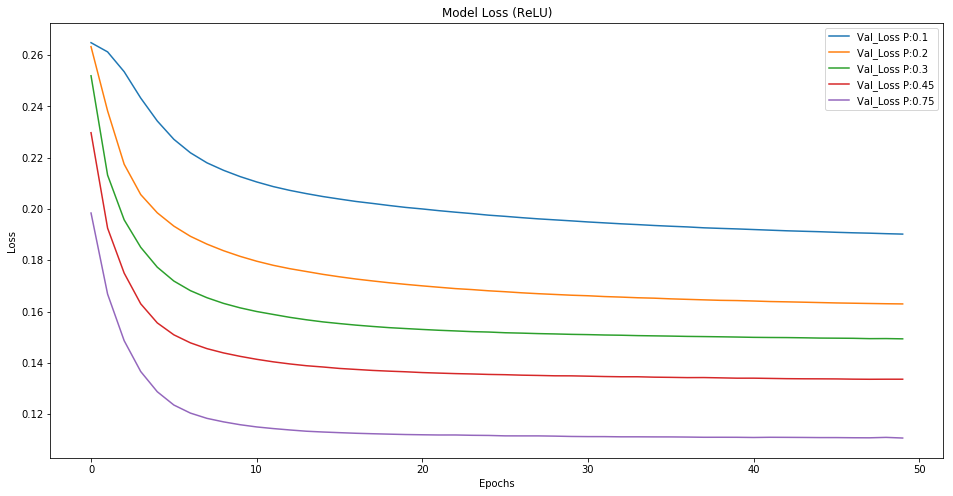

In [11]:
###graficar hists corruptos
import matplotlib.pyplot as plt 
%matplotlib inline

i=0
plt.figure(figsize=(16, 8))
for hist in hist_corruptos: 
    #plt.plot(hist.history['loss'],label="Loss P:"+str(ruidos[i]))
    plt.plot(hist.history['val_loss'],label="Val_Loss P:"+str(ruidos[i]))   
    i+=1
    
plt.title("Model Loss (ReLU)") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

Reconstruyendo modelo para ruido p: 0.1
10000/10000 [==============================] - 1s 58us/step
Error de reconstruccion encoder: 0.19022049844264985


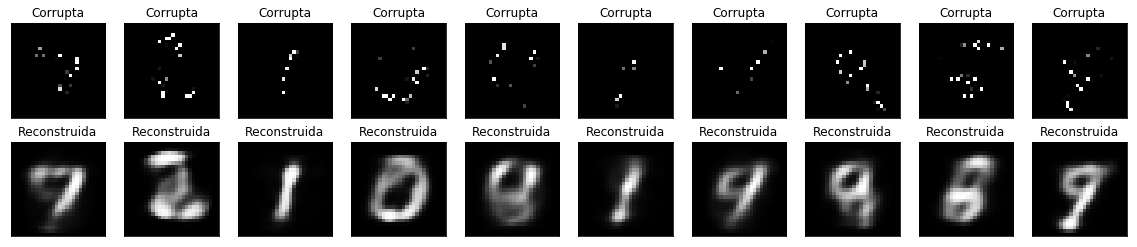

Reconstruyendo modelo para ruido p: 0.2
10000/10000 [==============================] - 1s 58us/step
Error de reconstruccion encoder: 0.1618444983959198


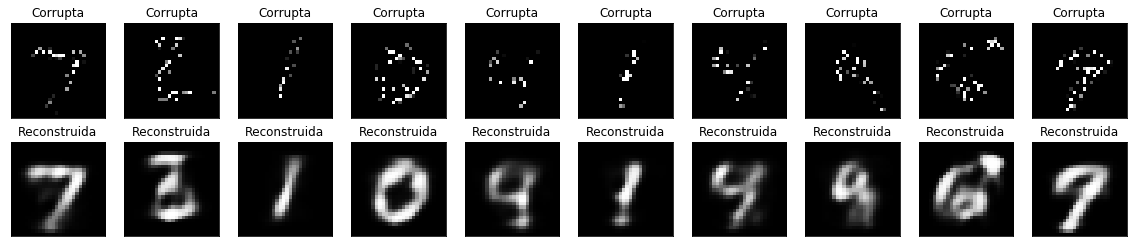

Reconstruyendo modelo para ruido p: 0.3
10000/10000 [==============================] - 1s 62us/step
Error de reconstruccion encoder: 0.14795746564865112


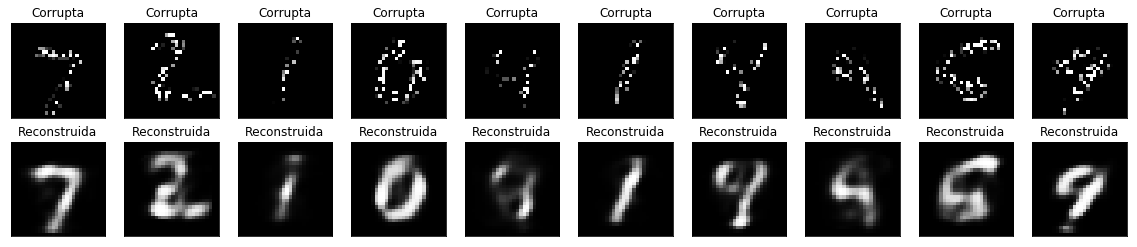

Reconstruyendo modelo para ruido p: 0.45
10000/10000 [==============================] - 1s 63us/step
Error de reconstruccion encoder: 0.1318843430519104


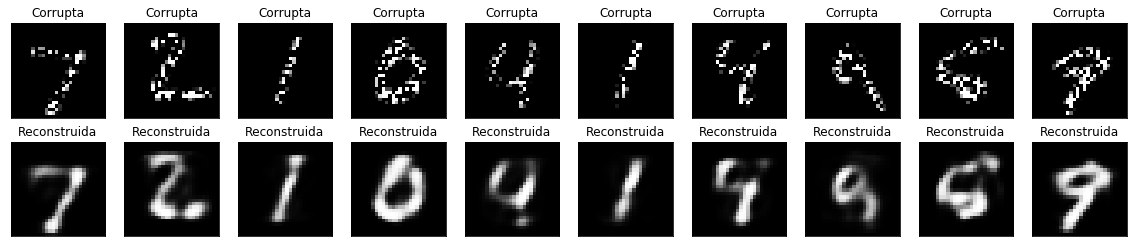

Reconstruyendo modelo para ruido p: 0.75
10000/10000 [==============================] - 1s 65us/step
Error de reconstruccion encoder: 0.10863272032737732


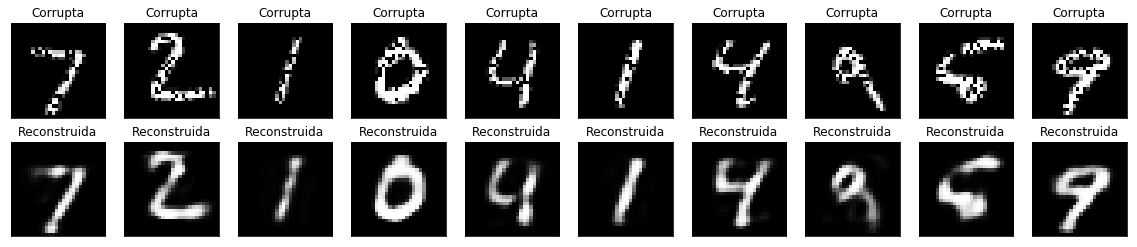

In [12]:
from keras.models import load_model

ruidos=[0.1,0.2,0.3,0.45,0.75]
for ruido in ruidos:
    print ("Reconstruyendo modelo para ruido p:", ruido)
    noisy_x_train, noisy_x_val, noisy_x_test = corromper(x_train, x_val, x_test, ruido)

    autoencoder = load_model('./corruptos/autoencoder_768x32_p_'+str(ruido)+'.h5')
    #Reconstruir desde autoencoder (encoder --> decoder)
    score = autoencoder.evaluate(noisy_x_test,x_test)
    print ("Error de reconstruccion encoder:", score) 
    
    input_img = autoencoder.input
    encoder_layer = autoencoder.layers[-2]
    encoder = Model(inputs=input_img, outputs=encoder_layer(input_img))
    decoded_shape = Input(shape=(32,))   
    decoder_layer = autoencoder.layers[-1] 
    decoder = Model(inputs=decoded_shape, outputs=decoder_layer(decoded_shape))

    encoded_test = encoder.predict(noisy_x_test)
    decoded_test = decoder.predict(encoded_test) 
    
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):    
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(noisy_x_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.title("Corrupta")
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.title("Reconstruida")    
    plt.show()

In [7]:
print ("Entrenando modelo para ruido p: 0.9")
noisy_x_train, noisy_x_val, noisy_x_test = corromper(x_train, x_val, x_test, 0.9)

input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(inputs=input_img, outputs=decoded)
encoder = Model(inputs=input_img, outputs=encoded)
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))

autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
hist09 = autoencoder.fit(noisy_x_train, x_train, epochs=50, batch_size=32,verbose=0,shuffle=True, validation_data=(noisy_x_val, x_val)) 
autoencoder.save('./corruptos/autoencoder_768x32_p_0.9.h5')

Entrenando modelo para ruido p: 0.9


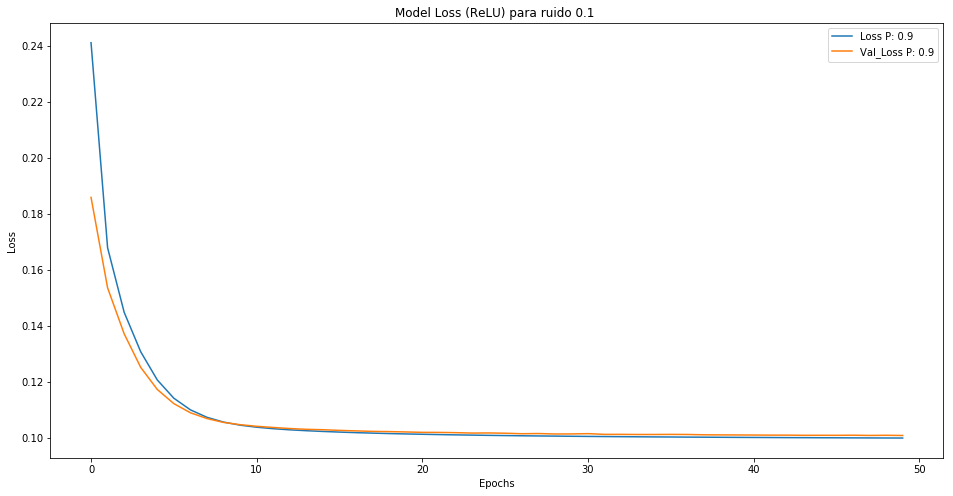

In [16]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.plot(hist09.history['loss'],label="Loss P: 0.9")
plt.plot(hist09.history['val_loss'],label="Val_Loss P: 0.9")   

    
plt.title("Model Loss (ReLU) para ruido 0.1 ") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

10000/10000 [==============================] - 0s 50us/step
Error de reconstruccion encoder: 0.0987689493060112
Modelo con 10% de ruido (p:0.9)


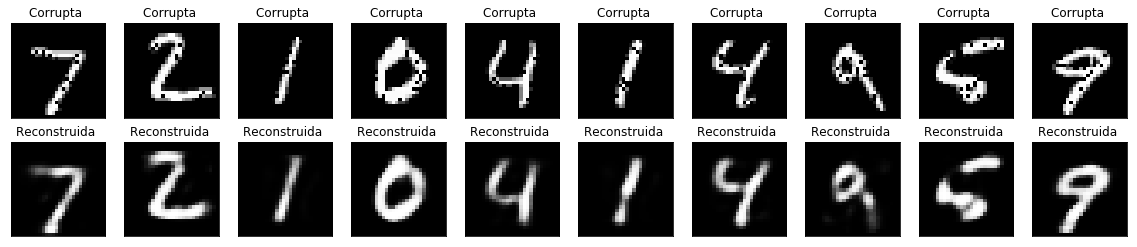

In [17]:
score = autoencoder.evaluate(noisy_x_test,x_test)
print ("Error de reconstruccion encoder:", score) 

input_img = autoencoder.input
encoder_layer = autoencoder.layers[-2]
encoder = Model(inputs=input_img, outputs=encoder_layer(input_img))
decoded_shape = Input(shape=(32,))   
decoder_layer = autoencoder.layers[-1] 
decoder = Model(inputs=decoded_shape, outputs=decoder_layer(decoded_shape))

encoded_test = encoder.predict(noisy_x_test)
decoded_test = decoder.predict(encoded_test) 
print ("Modelo con 10% de ruido (p:0.9)")
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noisy_x_test[i].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Corrupta ")
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_test[i].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Reconstruida ")    
plt.show()


> c) Utilice estas imágenes intencionalmente corruptas para entrenar un AE con fines de reducción de dimensionalidad. Durante el entrenamiento, proceda exactamente como en (b), pero su objetivo no será hacer *denoising* sino obtener una representación comprimida de alta calidad de las imágenes originales. Al final del entrenamiento, mida el error de reconstrucción como el desempeño en clasificación (vı́a kNN como en la sección anterior) de la representación obtenida. Comente.



In [8]:
from keras.models import load_model
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import time

ruidos=[0.1,0.2,0.3,0.45,0.75,0.9]
for ruido in ruidos:
    print ("Para ruido afecto a p:", ruido)
    noisy_x_train, noisy_x_val, noisy_x_test = corromper(x_train, x_val, x_test, ruido)
    autoencoder = load_model('./corruptos/autoencoder_768x32_p_'+str(ruido)+'.h5')
    #Reconstruir desde autoencoder (encoder --> decoder)
    score = autoencoder.evaluate(noisy_x_test,x_test)
    print ("Error de reconstruccion encoder:", score) 
    
    #Reconstruir los encoder desde el autoencoder
    input_img = autoencoder.input
    encoder_layer = autoencoder.layers[-2]
    inicio = time.time()
    encoder = Model(inputs=input_img, outputs=encoder_layer(input_img))    
    encoded_train = encoder.predict(noisy_x_train)
    encoded_test = encoder.predict(noisy_x_test)

    clf = KNeighborsClassifier(10)
    clf.fit(encoded_train, y_train)
    print ("Encoder Accuracy en base KNN: ",clf.score(encoded_test,y_test),"con", (time.time() - inicio),"segundos")


Para ruido afecto a p: 0.1
10000/10000 [==============================] - 1s 57us/step
Error de reconstruccion encoder: 0.1897958010196686
Encoder Accuracy en base KNN:  0.6611 con 67.29077386856079 segundos
Para ruido afecto a p: 0.2
10000/10000 [==============================] - 1s 59us/step
Error de reconstruccion encoder: 0.16180992732048036
Encoder Accuracy en base KNN:  0.8187 con 64.86830139160156 segundos
Para ruido afecto a p: 0.3
10000/10000 [==============================] - 1s 60us/step
Error de reconstruccion encoder: 0.14786213095188142
Encoder Accuracy en base KNN:  0.877 con 62.4911892414093 segundos
Para ruido afecto a p: 0.45
10000/10000 [==============================] - 1s 63us/step
Error de reconstruccion encoder: 0.1320042801618576
Encoder Accuracy en base KNN:  0.9233 con 55.567286014556885 segundos
Para ruido afecto a p: 0.75
10000/10000 [==============================] - 1s 63us/step
Error de reconstruccion encoder: 0.10877301017045975
Encoder Accuracy en base 

#### comentar k onda se ve... y decir que poco ruido generaliza mejor...pero mucho ruido corrompe mucho etc

> d) Diseñe otra manera de generar imágenes corruptas del dataset MNIST, por ejemplo algún tipo de ruido, sea creativo. Mida el error de reconstrucción y evalúe cualitativamente (visualización de la imagen corrupta y reconstruida) el resultado para un subconjunto representativo de imágenes

In [40]:
def corromper_gauss(x_train, x_val, x_test,std):
    noise_mask = std*np.random.standard_normal(size=x_train.shape)
    noisy_x_tr = x_train + noise_mask
    noise_mask = std*np.random.standard_normal(size=x_val.shape)
    noisy_x_v = x_val + noise_mask
    noise_mask = std*np.random.standard_normal(size=x_test.shape)
    noisy_x_t = x_test + noise_mask
    
    return noisy_x_tr, noisy_x_v, noisy_x_t

In [41]:
hist_corruptos_gauss = []
stdss=[0.05,0.1,0.3,0.45,0.75]
for stds in stdss:
    print ("Entrenando modelo para std:", stds)
    noisy_x_train, noisy_x_val, noisy_x_test = corromper_gauss(x_train, x_val, x_test, stds)

    input_img = Input(shape=(784,))
    encoded = Dense(32, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_img, outputs=decoded)
    encoder = Model(inputs=input_img, outputs=encoded)
    encoded_input = Input(shape=(32,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
       
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    hist = autoencoder.fit(noisy_x_train, x_train, epochs=50, batch_size=32,verbose=0,shuffle=True, validation_data=(noisy_x_val, x_val))    
    autoencoder.save('./corruptos/autoencoder_768x32_std_'+str(stds)+'.h5')
    hist_corruptos_gauss.append(hist)

Entrenando modelo para std: 0.05
Entrenando modelo para std: 0.1
Entrenando modelo para std: 0.3
Entrenando modelo para std: 0.45
Entrenando modelo para std: 0.75


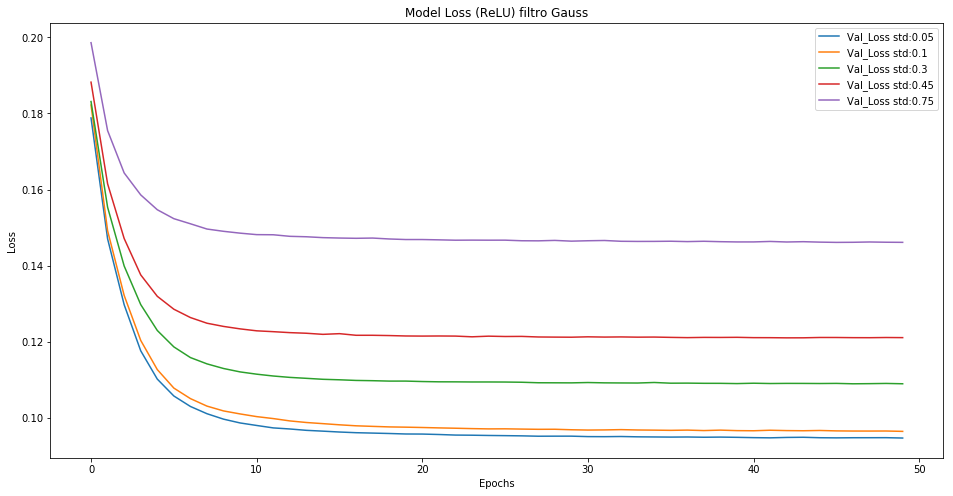

In [45]:
###graficar hists corruptos
import matplotlib.pyplot as plt 
%matplotlib inline

i=0
plt.figure(figsize=(16, 8))
for hist in hist_corruptos_gauss: 
    plt.plot(hist.history['val_loss'],label="Val_Loss std:"+str(stdss[i]))   
    i+=1
    
plt.title("Model Loss (ReLU) filtro Gauss") 
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

Considerando modelo para std: 0.05
10000/10000 [==============================] - 1s 71us/step
Error de reconstruccion encoder: 0.543813685131073
Encoder Accuracy en base KNN:  0.3598 con 78.26347041130066 segundos


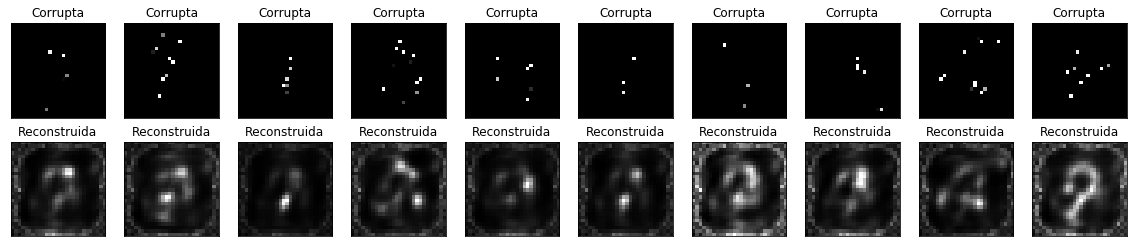

Considerando modelo para std: 0.1
10000/10000 [==============================] - 1s 75us/step
Error de reconstruccion encoder: 0.5901947393417358
Encoder Accuracy en base KNN:  0.5437 con 84.77425050735474 segundos


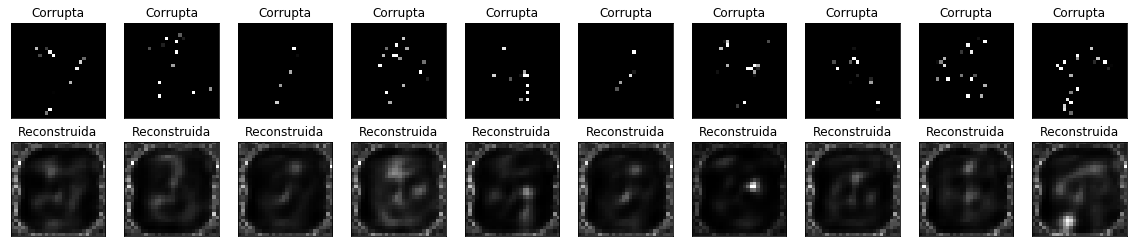

Considerando modelo para std: 0.3
10000/10000 [==============================] - 1s 76us/step
Error de reconstruccion encoder: 0.3801768864154816
Encoder Accuracy en base KNN:  0.866 con 78.35989761352539 segundos


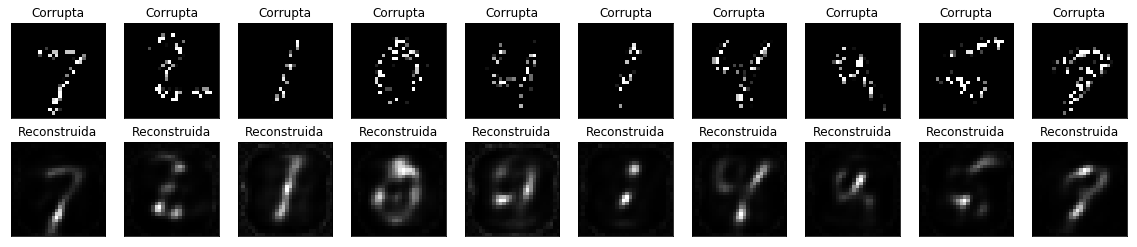

Considerando modelo para std: 0.45
10000/10000 [==============================] - 1s 78us/step
Error de reconstruccion encoder: 0.260099013710022
Encoder Accuracy en base KNN:  0.9192 con 66.25842571258545 segundos


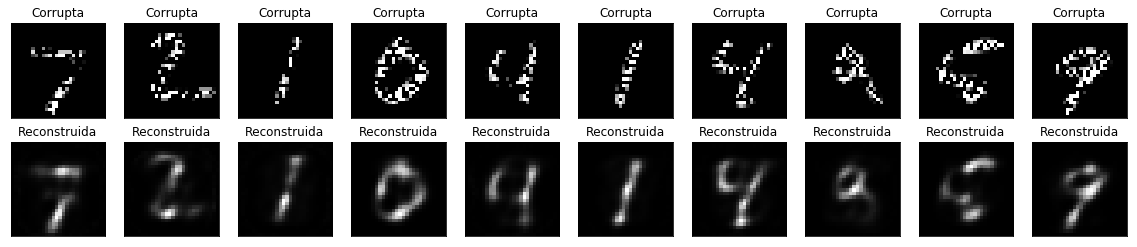

Considerando modelo para std: 0.75
10000/10000 [==============================] - 1s 79us/step
Error de reconstruccion encoder: 0.14229175052642823
Encoder Accuracy en base KNN:  0.9535 con 39.7011513710022 segundos


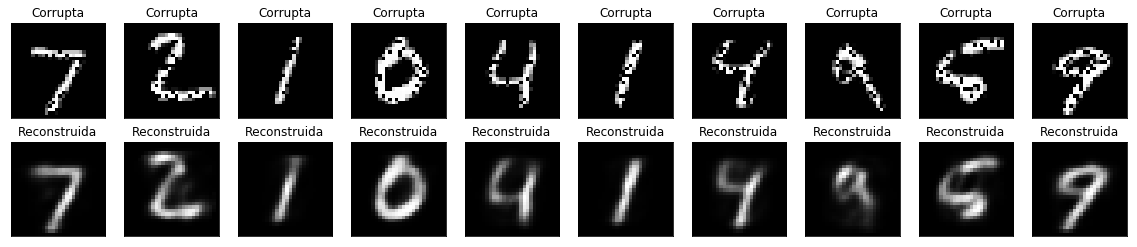

In [47]:
from keras.models import load_model


for stds in stdss:
    print ("Considerando modelo para std:", stds)
    noisy_x_train, noisy_x_val, noisy_x_test = corromper(x_train, x_val, x_test, stds)
    autoencoder = load_model('./corruptos/autoencoder_768x32_std_'+str(stds)+'.h5')
    #Reconstruir desde autoencoder (encoder --> decoder)
    score = autoencoder.evaluate(noisy_x_test,x_test)
    print ("Error de reconstruccion encoder:", score)     
    input_img = autoencoder.input
    encoder_layer = autoencoder.layers[-2]
    inicio = time.time()
    encoder = Model(inputs=input_img, outputs=encoder_layer(input_img))
    decoded_shape = Input(shape=(32,))   
    decoder_layer = autoencoder.layers[-1] 
    decoder = Model(inputs=decoded_shape, outputs=decoder_layer(decoded_shape))       
    encoded_train = encoder.predict(noisy_x_train)
    encoded_test = encoder.predict(noisy_x_test)
    decoded_test = decoder.predict(encoded_test)   
    
    clf = KNeighborsClassifier(10)
    clf.fit(encoded_train, y_train)
    print ("Encoder Accuracy en base KNN: ",clf.score(encoded_test,y_test),"con", (time.time() - inicio),"segundos")

    
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):    
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(noisy_x_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.title("Corrupta")
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.title("Reconstruida")    
    plt.show()
    


## comentarios finales ... se requiere std alta para abarcar mas zonas de la imagen y asi rescatar mayor info sobre el digito 'observado'
### comentar el knn igual xd

In [ ]:
####probar gaussianas de valores en la matriz de datos (como atención en zonas)

In [9]:
np.random.normal(0.6, 0.3, (4, 5))

array([[0.00370691, 0.28195643, 1.07287827, 0.99711877, 0.57977448],
       [0.91353404, 1.04220984, 0.06111747, 0.36261416, 0.55755208],
       [0.65737   , 0.56834191, 0.42579707, 0.73489481, 0.40044923],
       [1.56359453, 0.67206127, 0.43678445, 1.06128102, 0.54326394]])

In [43]:
x_train.shape

(55000, 784)

In [42]:
cov=[[0,1],[1,0]]
mean=[0.5,0.5]
x,y = np.random.multivariate_normal(mean, cov, 16).T

/home/casapanshop/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()


In [30]:
bajos=[]
altos=[]
medios=[]
for xs in x:
    if xs < 0.1:
        bajos.append(xs)
    if xs > 0.75:
        altos.append(xs)
    else:
        medios.append(xs)

In [33]:
len(medios)

32